<a href="https://colab.research.google.com/github/MFairuziIszamAziz/APMProjectKel8A/blob/main/P5/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
# import dataset training
!gdown --id 1JzMMGwMpLQHlR5x-IbPykadAGEoL_CIv
# import dataset test
!gdown --id 1VN3aiKobuwmo5Fo-2T1SOtI3FfuVDn3T

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1JzMMGwMpLQHlR5x-IbPykadAGEoL_CIv
To: /content/kendaraan_train.csv
100% 15.2M/15.2M [00:00<00:00, 117MB/s] 
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1VN3aiKobuwmo5Fo-2T1SOtI3FfuVDn3T
To: /content/kendaraan_test.csv
100% 2.31M/2.31M [00:00<00:00, 67.8MB/s]


In [ ]:
df1 = pd.read_csv("kendaraan_train.csv")
df2 = pd.read_csv("kendaraan_test.csv")
data = df1.append(df2)
data

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1.0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2.0,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3.0,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4.0,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5.0,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
47634,NaN,Pria,61.0,1.0,46.0,0.0,> 2 Tahun,Pernah,31039.0,124.0,67.0,0
47635,NaN,Pria,41.0,1.0,15.0,0.0,1-2 Tahun,Pernah,2630.0,157.0,232.0,0
47636,NaN,Pria,24.0,1.0,29.0,1.0,< 1 Tahun,Tidak,33101.0,152.0,211.0,0
47637,NaN,Pria,59.0,1.0,30.0,0.0,1-2 Tahun,Pernah,37788.0,26.0,239.0,1


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.columns

Index(['id', 'Jenis_Kelamin', 'Umur', 'SIM', 'Kode_Daerah', 'Sudah_Asuransi',
       'Umur_Kendaraan', 'Kendaraan_Rusak', 'Premi', 'Kanal_Penjualan',
       'Lama_Berlangganan', 'Tertarik'],
      dtype='object')

In [ ]:
data.describe(include='all')

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,319030,319256.000000,319066.000000,319164.000000,319241.000000,319195,319282,318901.000000,319171.000000,319478.000000,333470.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Pria,NaN,NaN,NaN,NaN,1-2 Tahun,Pernah,NaN,NaN,NaN,NaN
freq,NaN,172548,NaN,NaN,NaN,NaN,167727,161164,NaN,NaN,NaN,NaN
mean,142916.000000,NaN,38.840028,0.997859,26.394380,0.458603,NaN,NaN,30550.097899,112.045299,154.310350,0.122551
std,82512.446734,NaN,15.526398,0.046217,13.246852,0.498284,NaN,NaN,17192.548724,54.196470,83.686932,0.327921
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24397.000000,29.000000,82.000000,0.000000
50%,142916.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31660.000000,133.000000,154.000000,0.000000
75%,214373.500000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39392.000000,152.000000,227.000000,0.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333470 entries, 0 to 47638
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  float64
 1   Jenis_Kelamin      319030 non-null  object 
 2   Umur               319256 non-null  float64
 3   SIM                319066 non-null  float64
 4   Kode_Daerah        319164 non-null  float64
 5   Sudah_Asuransi     319241 non-null  float64
 6   Umur_Kendaraan     319195 non-null  object 
 7   Kendaraan_Rusak    319282 non-null  object 
 8   Premi              318901 non-null  float64
 9   Kanal_Penjualan    319171 non-null  float64
 10  Lama_Berlangganan  319478 non-null  float64
 11  Tertarik           333470 non-null  int64  
dtypes: float64(8), int64(1), object(3)
memory usage: 33.1+ MB


In [ ]:
# Atribut "id" juga di-drop karena tidak akan digunakan tahapan-tahapan selanjutnya
data = data.drop(axis=1, columns=["id", "Jenis_Kelamin", "SIM", "Sudah_Asuransi", "Umur_Kendaraan", "Kendaraan_Rusak", "Tertarik"])
data.sample(5)

,Umur,Kode_Daerah,Premi,Kanal_Penjualan,Lama_Berlangganan
130410,23.0,8.0,36437.0,NaN,41.0
201846,23.0,28.0,45511.0,26.0,168.0
24764,21.0,9.0,38001.0,160.0,41.0
20279,26.0,29.0,41921.0,152.0,288.0
45641,61.0,13.0,17934.0,124.0,110.0


In [ ]:
data.isna().sum()

Umur                 14214
Kode_Daerah          14306
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
dtype: int64

In [ ]:
data['Umur'] = data['Umur'].replace(np.NaN, data['Umur'].mean())
data['Kode_Daerah'] = data['Kode_Daerah'].replace(np.NaN, data['Kode_Daerah'].mode()[0])
data['Premi'] = data['Premi'].replace(np.NaN, data['Premi'].mean())
data['Kanal_Penjualan'] = data['Kanal_Penjualan'].replace(np.NaN, data['Kanal_Penjualan'].mode()[0])
data['Lama_Berlangganan'] = data['Lama_Berlangganan'].replace(np.NaN, data['Lama_Berlangganan'].mean())

In [ ]:
data.isna().sum()

Umur                 0
Kode_Daerah          0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
dtype: int64

In [ ]:
data_norm = (data - data.mean()) / data.std()
data_norm.sample(5)

,Umur,Kode_Daerah,Premi,Kanal_Penjualan,Lama_Berlangganan
118133,-1.174313,0.118542,4.682498e-13,0.712981,1.473399
19185,-1.174313,1.121344,-1.689248e-01,0.712981,-0.894985
106698,0.537127,0.118542,1.191171e+00,0.153655,0.960656
205360,-1.174313,0.272819,1.742068e-01,0.862134,0.276999
234773,-1.108488,0.349958,-1.660646e+00,0.862134,1.485607


In [ ]:
sns.set(font_scale = 1.15)

Text(0.5, 1.0, 'Kode_Daerah')

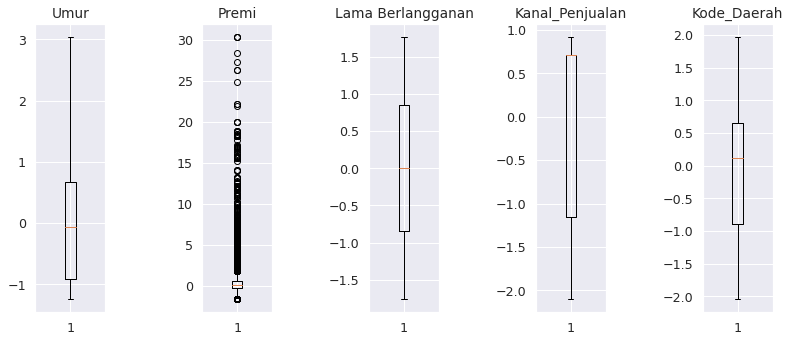

In [ ]:
fig, (Umur, Premi, Lama_Berlangganan, Kanal_Penjualan, Kode_Daerah) = plt.subplots(1,5)
fig.tight_layout()
fig.set_size_inches(12,5)
Umur.boxplot(data_norm["Umur"])
Umur.set_title("Umur")
Premi.boxplot(data_norm["Premi"])
Premi.set_title("Premi")
Lama_Berlangganan.boxplot(data_norm["Lama_Berlangganan"])
Lama_Berlangganan.set_title("Lama Berlangganan")
Kanal_Penjualan.boxplot(data_norm["Kanal_Penjualan"])
Kanal_Penjualan.set_title("Kanal_Penjualan")
Kode_Daerah.boxplot(data_norm["Kode_Daerah"])
Kode_Daerah.set_title("Kode_Daerah")

In [ ]:
data_norm.describe()
Q1_norm = data_norm.Premi.quantile(0.25)
Q3_norm = data_norm.Premi.quantile(0.75)

data.describe()
Q1 = data.Premi.quantile(0.25)
Q3 = data.Premi.quantile(0.75)
Q1, Q3

(24853.0, 38930.0)

In [ ]:
IQR_norm = Q3_norm - Q1_norm
IQR = Q3 - Q1
IQR

14077.0

In [ ]:
lb_norm = Q1_norm - 1.5 * IQR_norm
la_norm = Q3_norm + 1.5 * IQR_norm
limit_bawah = Q1 - 1.5 * IQR
limit_atas = Q3 + 1.5 * IQR
limit_bawah, limit_atas

(3737.5, 60045.5)

In [ ]:
data_norm[(data_norm.Premi < lb_norm) | (data_norm.Premi > la_norm)]

,Umur,Kode_Daerah,Premi,Kanal_Penjualan,Lama_Berlangganan
3,1.261197,1.661315,-1.660646,0.190944,-1.114732
9,0.997899,0.195681,3.469555,0.190944,-1.542017
15,-0.516067,-1.424231,-1.660646,0.712981,-0.272368
19,0.866250,0.118542,-1.660646,0.190944,-1.749556
34,-0.318593,0.735651,-1.660646,0.787557,0.728701
...,...,...,...,...,...
47624,-0.911014,1.661315,-1.660646,0.712981,0.399081
47625,2.511865,0.658512,-1.660646,-2.065002,-1.187981
47630,2.248566,0.118542,-1.660646,0.918067,-1.419936
47635,0.142179,-0.884260,-1.660646,0.806202,0.948448


In [ ]:
data_norm = data_norm[(data_norm.Premi > lb_norm) & (data_norm.Premi < la_norm)]
data = data[(data.Premi > limit_bawah) & (data.Premi < limit_atas)]
data.head()

,Umur,Kode_Daerah,Premi,Kanal_Penjualan,Lama_Berlangganan
0,30.0,33.0,28029.0,152.0,97.0
1,48.0,39.0,25800.0,29.0,158.0
2,21.0,46.0,32733.0,160.0,119.0
4,50.0,35.0,34857.0,88.0,194.0
5,21.0,35.0,22735.0,152.0,171.0


Text(0.5, 1.0, 'Kode_Daerah')

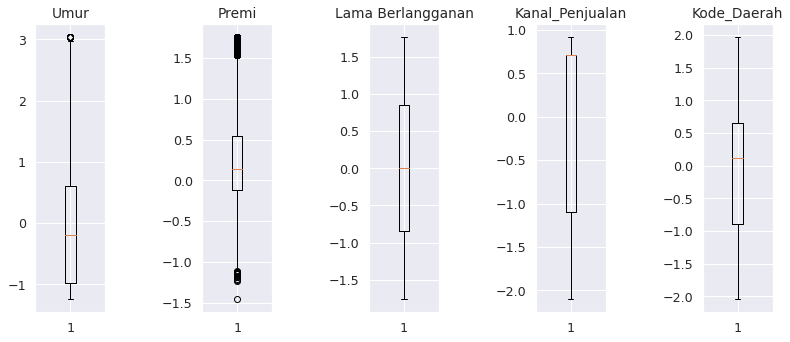

In [ ]:
fig, (Umur, Premi, Lama_Berlangganan, Kanal_Penjualan, Kode_Daerah) = plt.subplots(1,5)
fig.tight_layout()
fig.set_size_inches(12,5)
Umur.boxplot(data_norm["Umur"])
Umur.set_title("Umur")
Premi.boxplot(data_norm["Premi"])
Premi.set_title("Premi")
Lama_Berlangganan.boxplot(data_norm["Lama_Berlangganan"])
Lama_Berlangganan.set_title("Lama Berlangganan")
Kanal_Penjualan.boxplot(data_norm["Kanal_Penjualan"])
Kanal_Penjualan.set_title("Kanal_Penjualan")
Kode_Daerah.boxplot(data_norm["Kode_Daerah"])
Kode_Daerah.set_title("Kode_Daerah")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


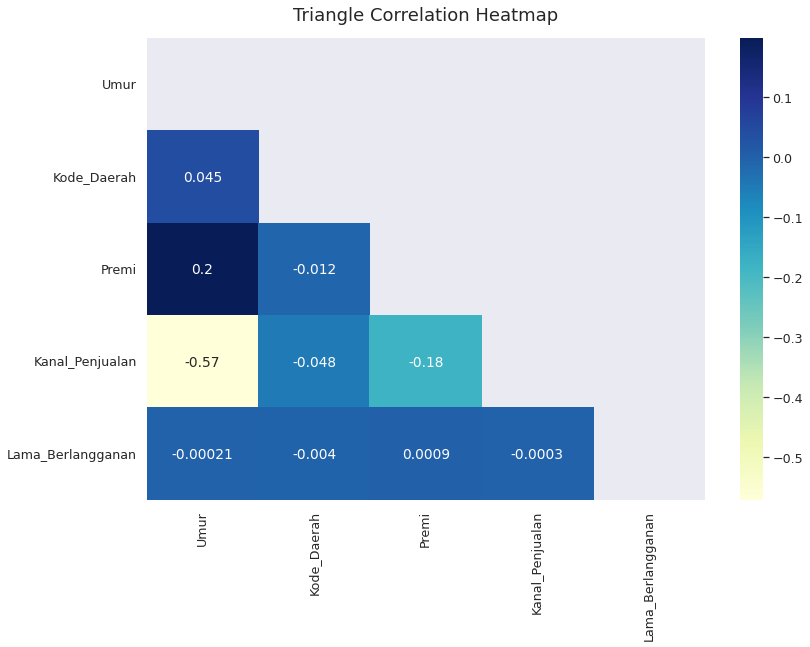

In [ ]:
plt.figure(figsize=(12.5, 8.5))
mask = np.triu(np.ones_like(data_norm.corr(), dtype=np.bool))
heatmap = sns.heatmap(data_norm.corr(), mask=mask, annot=True, cmap='YlGnBu')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 18}, pad=18)
plt.show()

In [ ]:
selected_features = data_norm.loc[:, ['Umur', 'Kanal_Penjualan']]
data_sf = selected_features
data_sf.head()

,Umur,Kanal_Penjualan
0,-0.581891,0.712981
1,0.602951,-1.580253
2,-1.174313,0.862134
4,0.734601,-0.480247
5,-1.174313,0.712981


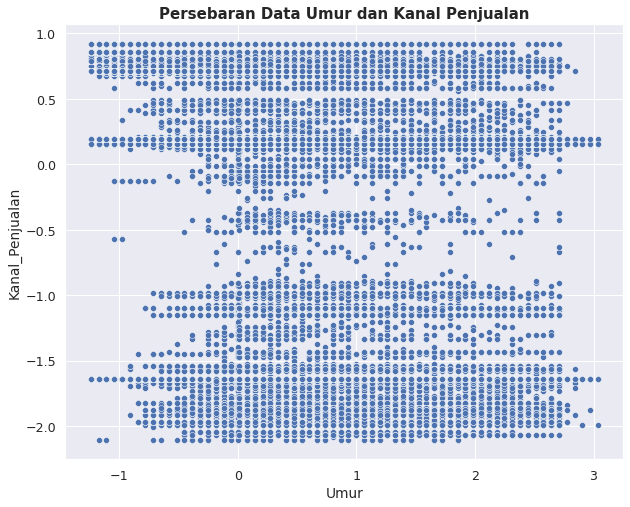

In [ ]:
plt.figure(figsize=(10, 8))
plt.title(label='Persebaran Data Umur dan Kanal Penjualan', fontsize=15, fontweight='bold')
sns.scatterplot(data=data_sf, x="Umur", y="Kanal_Penjualan")
plt.show()

In [ ]:
features_value = data_sf.values
features_value

array([[-0.58189123,  0.71298067],
       [ 0.6029514 , -1.58025306],
       [-1.17431255,  0.86213408],
       ...,
       [ 1.45867108,  0.19094372],
       [-0.97683877,  0.71298067],
       [ 1.3270219 , -1.63618559]])

In [ ]:
data_sf.to_csv("hasil_eksplorasi_data.csv", header=True)

In [ ]:
def euclidean(x, y):
  return np.sqrt(np.sum((x - y) ** 2))

In [ ]:
# Membuat class k_means
class k_means:

  # Membuat constructor untuk inisialisasi object
  def __init__(self, K, max_iters = 100):
    
    # Inisialisasi constructor yang digunakan untuk membuat instance objek
    self.K = K
    self.max_iters = max_iters

    # Inisialisasi list kosong sebagai indeks sampel untuk setiap cluster
    self.clusters = [[] for i in range(self.K)]

    # Rata-rata vektor (centroid) fitur untuk setiap cluster
    self.centroids = []

  def closestCentroid(self, sample, centroids):
    # Jarak sampel saat ini ke setiap centroid
    distances = [euclidean(sample, point) for point in centroids]
    closest_centroid = np.argmin(distances)
    return closest_centroid

  def createClusters(self, centroids):
    # Assign sampel ke centroid terdekat untuk membuat cluster
      clusters = [[] for i in range(self.K)]
      for i, sample in enumerate(self.X):
        centroid_idx = self.closestCentroid(sample, centroids)
        clusters[centroid_idx].append(i)
      return clusters

  def getCentroids(self, clusters):
    # Assign nilai rata-rata cluster ke centroid
    centroids = np.zeros((self.K, self.n_features))
    for cluster_idx, cluster in enumerate(clusters):
      cluster_mean = np.mean(self.X[cluster], axis=0)
      centroids[cluster_idx] = cluster_mean
    return centroids

  def isConverged(self, centroids_old, centroids):
    # Inisialisasi dan menghitung jarak antara setiap centroid lama dan baru 
    # untuk semua centroid dengan Euclidean
    distances = [euclidean(centroids_old[i], centroids[i]) for i in 
                 range(self.K)]
    return sum(distances) == 0

  def getClusterLabels(self):
    # Setiap sampel akan mendapatkan label dari cluster
    labels = np.empty(self.n_samples)

    # Melakukan iterasi di setiap cluster
    for cluster_idx, cluster in enumerate(self.clusters):
      for sample_idx in cluster:
        labels[sample_idx] = cluster_idx
    return labels

  def plot(self):
    fig, ax = plt.subplots(figsize=(10, 8))
    for i, index in enumerate(self.clusters):
      point = self.X[index].T
      ax.scatter(*point)
    for point in self.centroids:
      ax.scatter(*point, marker='x', color="black", linewidth=1.8, s=75)

    plt.title(label='Hasil Data Clustering', fontsize=15, fontweight='bold')
    plt.xlabel("Umur")
    plt.ylabel("Kanal Penjualan")
    plt.show()

  def predict(self, X):
    # Mengecek jika objek bukan instance dari suatu class
    if not isinstance(X, np.ndarray):
      X = np.array(X)
    # Mengecek jika fitur harus lebih dari 0
    if X.size == 0:
      raise ValueError("Jumlah fitur harus lebih dari 0")

    # Mengecek dimensi array
    if X.ndim == 1:   # jika dimensinya 1                
      self.n_samples, self.n_features = 1, X.shape
    else:   # jika dimensinya bukan 1
      self.n_samples, self.n_features = X.shape[0], np.prod(X.shape[1:])    
    
    # Inisialisasi X
    self.X = X

    # Inisialisasi centroid
    # Menggunakan random_sample untuk mengahasilkan 0 - n_sample secara random
    # Menggunakan replace=False agar sample unik
    random_sample = np.random.choice(self.n_samples, self.K, replace = False)

    # Inisialisasi centroid
    self.centroids = [self.X[i] for i in random_sample]

    # Mengoptimalkan clusters
    for i in range(self.max_iters):
      
      # Assign sampel ke centroid terdekat
      self.clusters = self.createClusters(self.centroids)
        
      # Menghitung centroid baru dari cluster
      centroids_old = self.centroids
      self.centroids = self.getCentroids(self.clusters)

      # Mengecek apakah cluster telah berubah
      if self.isConverged(centroids_old, self.centroids):
        break
      
    # Meklasifikasi sampel sebagai indeks cluster-nya
    return self.getClusterLabels()

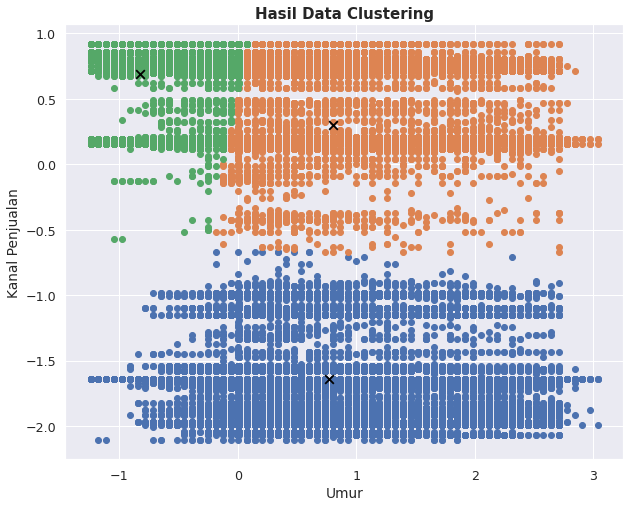

In [33]:
# Membuat visualisasi K-Mean clustering dengan Scatter Plot 
kmeans = k_means(K=3)
predict = kmeans.predict(data_sf)
kmeans.plot()

In [35]:
wcss_list = []
K = range(2, 11)
for i in K:
  km = KMeans(i)
  km.fit(data_sf)
  wcss_iters = km.inertia_
  wcss_list.append(wcss_iters)

In [36]:
wcss_table = pd.DataFrame({'Jumlah Cluster': K, 'Within-Cluster Sum of Square': wcss_list})
wcss_table

,Jumlah Cluster,Within-Cluster Sum of Square
0,2,201739.322753
1,3,102410.321770
2,4,69976.696496
3,5,41763.507154
4,6,33914.884562
5,7,27218.807782
6,8,23556.019054
7,9,20038.705320
8,10,17317.548188


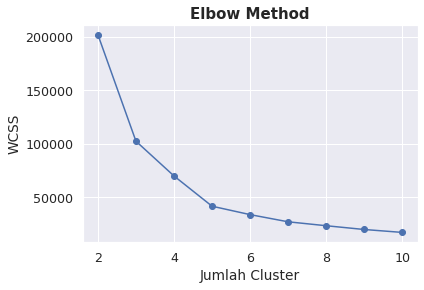

In [37]:
plt.title(label='Elbow Method', fontsize=15, fontweight='bold')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.plot(K, wcss_list, 'bo-')

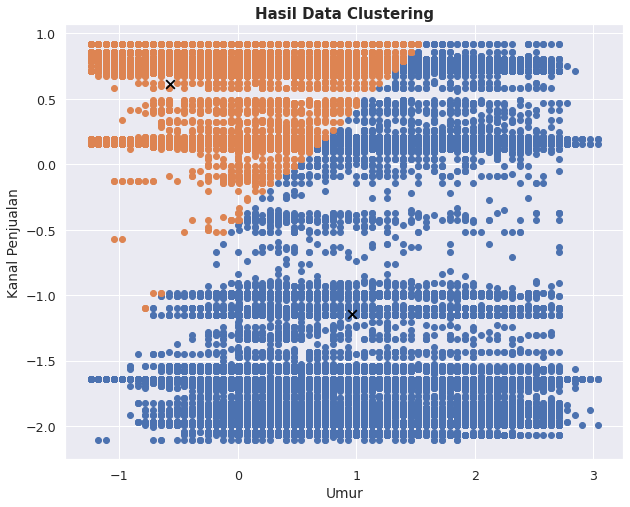

In [38]:
exper_kmeans = k_means(K=2)
exper_predict = exper_kmeans.predict(data_sf)
exper_kmeans.plot()

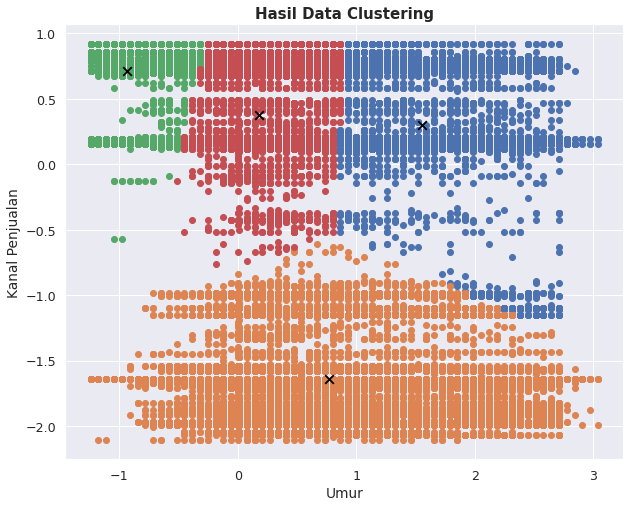

In [39]:
exper_kmeans = k_means(K=4)
exper_predict = exper_kmeans.predict(data_sf)
exper_kmeans.plot()

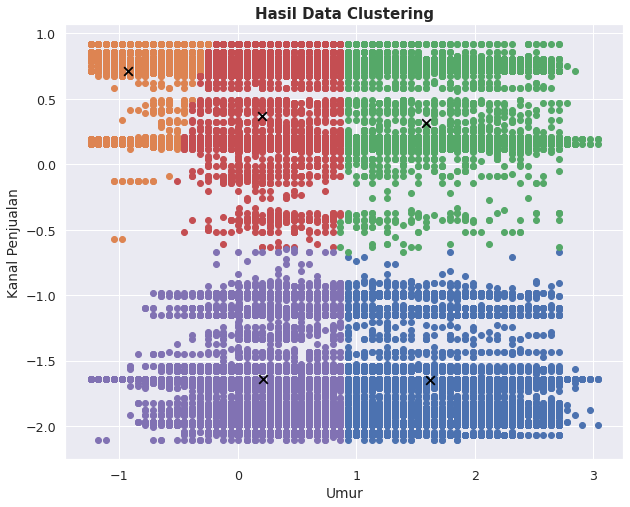

In [40]:
exper_kmeans = k_means(K=5)
exper_predict = exper_kmeans.predict(data_sf)
exper_kmeans.plot()

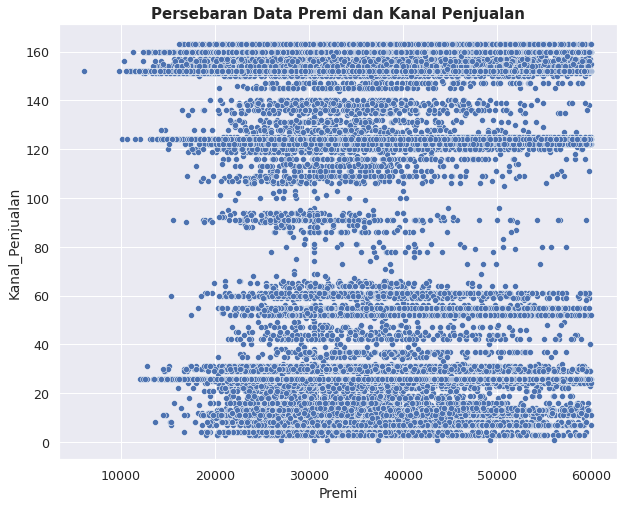

In [41]:
diff_features = data.loc[:, ['Premi','Kanal_Penjualan']]
plt.figure(figsize=(10, 8))
plt.title(label='Persebaran Data Premi dan Kanal Penjualan', fontsize=15, fontweight='bold')
sns.scatterplot(data=diff_features, x="Premi", y="Kanal_Penjualan")
plt.show()

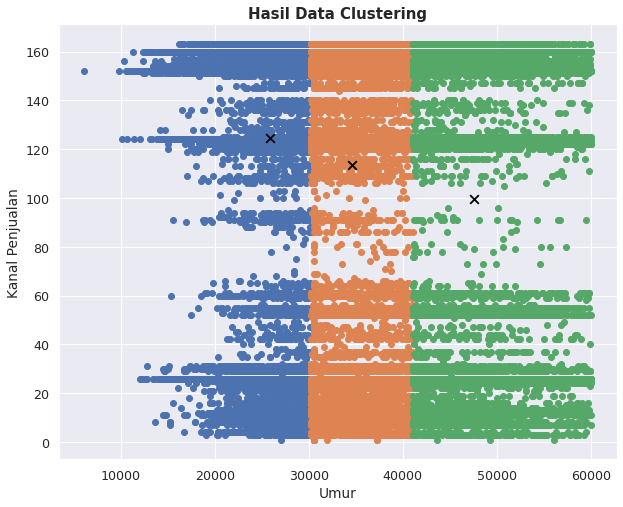

In [42]:
kmeans = k_means(K=3)
predict = kmeans.predict(diff_features)
kmeans.plot()

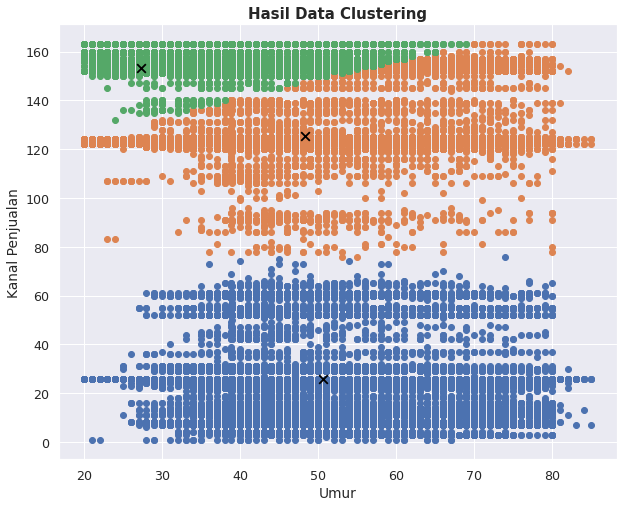

In [43]:
data_wo_norm = data.loc[:, ['Umur', 'Kanal_Penjualan']]
exper_kmeans = k_means(K=3)
exper_predict = exper_kmeans.predict(data_wo_norm)
exper_kmeans.plot()